In [10]:
import pandas as pd;
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.rcParams.update({'font.size': 14})

path = '../../../k6/results/'

def convert_to_MiB(value):
    if 'GiB' in value:
        return str(int(float(value.replace('GiB', '')) * 1024))
    if 'MiB' in value:
        return value.replace('MiB', '')
    if 'B' in value:
        return str(int(float(value.replace('B', '')) / 1024))
    return value

def detect_outliers(df, features, contamination=0.1):
    clf = IsolationForest(contamination=contamination, random_state=42)
    outliers = clf.fit_predict(df[features])
    return outliers == 1

def graph_row(plot_func, dataset, features, height=3, width=20):
    cols = len(features)
    fig, axes = plt.subplots(ncols=cols, figsize=(width, height))
    plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.95, bottom=0.05)
    for x, f in enumerate(features):
        plot_func(dataset, f, axes[x], idx=x)
    return plt

services = ["monolith", "cdn", "discovery", "teasers", "recommendations"]

In [11]:
dirty_df = pd.read_csv(f'{path}monolith/10000/metrics.csv', sep=',')

services = ["monolith", "cdn"]
dirty_df['total_cpu_percent'] = dirty_df[[f'{s}_cpu_percent' for s in services]].sum(axis=1)
dirty_df['total_mem_usage'] = dirty_df[[f'{s}_mem_usage' for s in services]].sum(axis=1)

duration = ['duration_mean', 'duration_min', 'duration_max', 'duration_count']
throughput = ['throughput_mean', 'throughput_min', 'throughput_max', 'throughput_count']
err = ['err_mean', 'err_count']

dirty_df = dirty_df[dirty_df['timestamp'] >= 30].dropna(subset=[*duration, *throughput]).reset_index(drop=True)

mask = detect_outliers(dirty_df, [*duration, *throughput])
monolith_df = dirty_df[mask].copy().reset_index(drop=True)

In [12]:
dirty_df = pd.read_csv(f'{path}csr/10000/metrics.csv', sep=',')

services = ["monolith", "cdn"]
dirty_df['total_cpu_percent'] = dirty_df[[f'{s}_cpu_percent' for s in services]].sum(axis=1)
dirty_df['total_mem_usage'] = dirty_df[[f'{s}_mem_usage' for s in services]].sum(axis=1)

duration = ['duration_mean', 'duration_min', 'duration_max', 'duration_count']
throughput = ['throughput_mean', 'throughput_min', 'throughput_max', 'throughput_count']
err = ['err_mean', 'err_count']

dirty_df = dirty_df[dirty_df['timestamp'] >= 30].dropna(subset=[*duration, *throughput]).reset_index(drop=True)

mask = detect_outliers(dirty_df, [*duration, *throughput])
csr_df = dirty_df[mask].copy().reset_index(drop=True)

In [13]:
dirty_df = pd.read_csv(f'{path}ssrh/10000/metrics.csv', sep=',')

services = ["monolith", "cdn", "discovery", "teasers", "recommendations"]
dirty_df['total_cpu_percent'] = dirty_df[[f'{s}_cpu_percent' for s in services]].sum(axis=1)
dirty_df['total_mem_usage'] = dirty_df[[f'{s}_mem_usage' for s in services]].sum(axis=1)

duration = ['duration_mean', 'duration_min', 'duration_max', 'duration_count']
throughput = ['throughput_mean', 'throughput_min', 'throughput_max', 'throughput_count']
err = ['err_mean', 'err_count']

dirty_df = dirty_df[dirty_df['timestamp'] >= 30].dropna(subset=[*duration, *throughput]).reset_index(drop=True)

mask = detect_outliers(dirty_df, [*duration, *throughput])
ssrh_df = dirty_df[mask].copy().reset_index(drop=True)

In [14]:
dirty_df = pd.read_csv(f'{path}ssrv/10000/metrics.csv', sep=',')

services = ["monolith", "cdn", "discovery", "teasers", "recommendations", "homepage"]
dirty_df['total_cpu_percent'] = dirty_df[[f'{s}_cpu_percent' for s in services]].sum(axis=1)
dirty_df['total_mem_usage'] = dirty_df[[f'{s}_mem_usage' for s in services]].sum(axis=1)

duration = ['duration_mean', 'duration_min', 'duration_max', 'duration_count']
throughput = ['throughput_mean', 'throughput_min', 'throughput_max', 'throughput_count']
err = ['err_mean', 'err_count']

dirty_df = dirty_df[dirty_df['timestamp'] >= 30].dropna(subset=[*duration, *throughput]).reset_index(drop=True)

mask = detect_outliers(dirty_df, [*duration, *throughput])
ssrv_df = dirty_df[mask].copy().reset_index(drop=True)

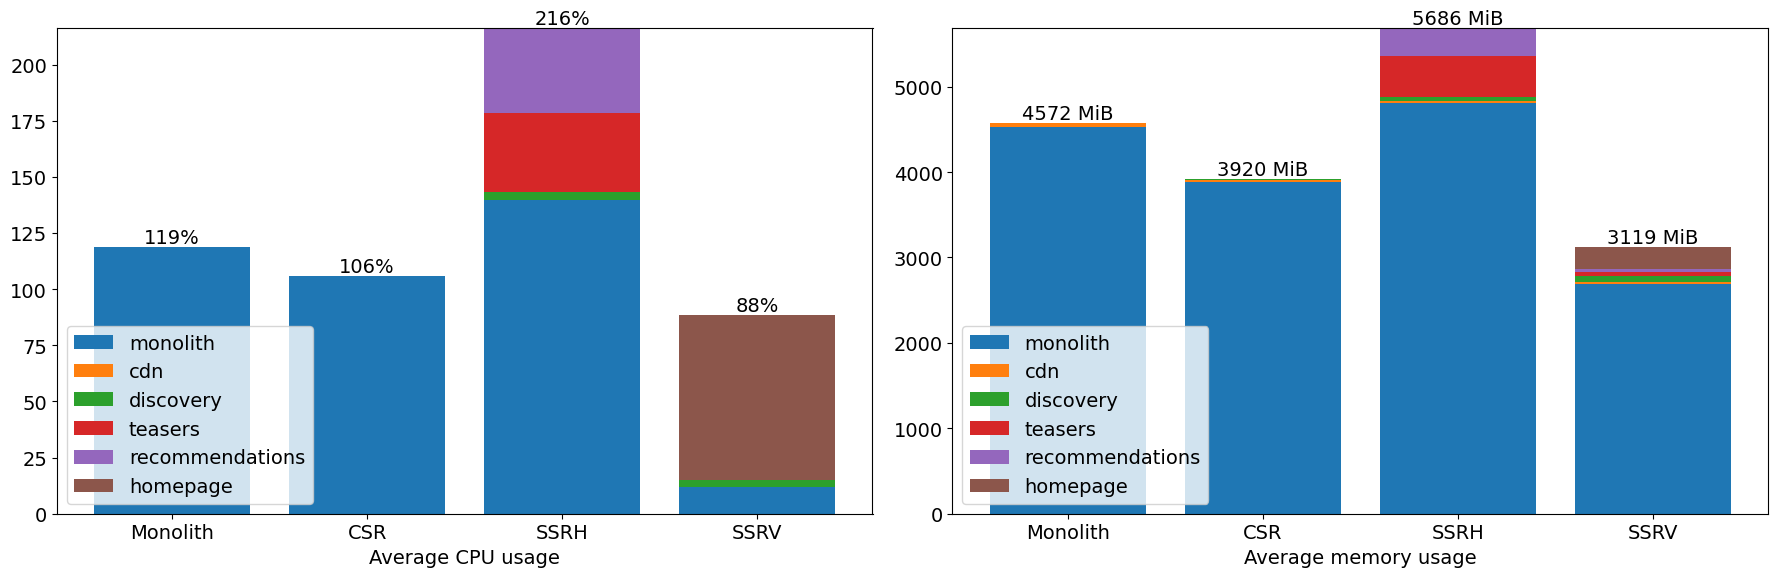

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# service_colors = {
#     'monolith': '#2ecc71',
#     'cdn': '#3498db',
#     'discovery': '#9b59b6',
#     'teasers': '#e74c3c',
#     'recommendations': '#f1c40f',
#     'homepage': '#1abc9c'
# }

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

architectures = []

monolith_services = ['monolith', 'cdn']
csr_services = ['monolith', 'discovery', 'cdn']
ssrh_services = ['monolith', 'cdn', 'discovery', 'teasers', 'recommendations']
ssrv_services = ['monolith', 'cdn', 'discovery', 'teasers', 'recommendations', 'homepage']

def plot_stacked_bars(ax, metric_suffix, ylabel, xlabel):
    architectures = []
    
    monolith_means = [monolith_df[f'{service}{metric_suffix}'].mean() for service in monolith_services]
    architectures.append(('Monolith', monolith_services, monolith_means))

    csr_means = [csr_df[f'{service}{metric_suffix}'].mean() for service in csr_services]
    architectures.append(('CSR', csr_services, csr_means))
    
    ssrh_means = [ssrh_df[f'{service}{metric_suffix}'].mean() for service in ssrh_services]
    architectures.append(('SSRH', ssrh_services, ssrh_means))
    
    ssrv_means = [ssrv_df[f'{service}{metric_suffix}'].mean() for service in ssrv_services]
    architectures.append(('SSRV', ssrv_services, ssrv_means))
    
    x = np.arange(len(architectures))
    bottom = np.zeros(len(architectures))
    
    for service in ['monolith', 'cdn', 'discovery', 'teasers', 'recommendations', 'homepage']:
        values = []
        for arch_name, services, means in architectures:
            if service in services:
                service_index = services.index(service)
                values.append(means[service_index])
            else:
                values.append(0)
        
        ax.bar(x, values, bottom=bottom, label=service)
        bottom += values
    
    for i in range(len(architectures)):
        total = sum(architectures[i][2])
        if metric_suffix == '_cpu_percent':
            ax.text(i, total, f'{total:.0f}%', ha='center', va='bottom')
        else:
            ax.text(i, total, f'{total:.0f} MiB', ha='center', va='bottom')
    
    ax.set_xlabel(xlabel)
    ax.set_xticks(x)
    ax.legend(loc='lower left')
    ax.set_xticklabels(['Monolith','CSR', 'SSRH', 'SSRV'])

plot_stacked_bars(ax1, '_cpu_percent', 'Mean CPU Usage (%)', 'Average CPU usage')
plot_stacked_bars(ax2, '_mem_usage', 'Mean Memory Usage (MiB)', 'Average memory usage')

handles, labels = ax2.get_legend_handles_labels()

plt.tight_layout()
plt.show()

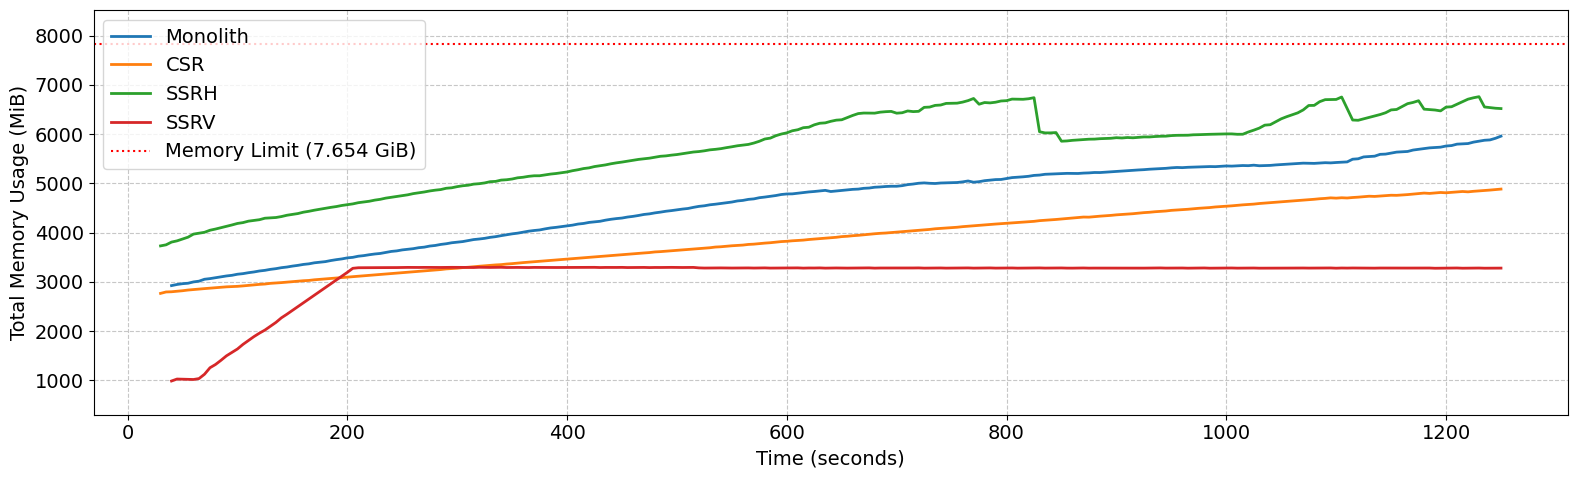

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))

plt.plot(monolith_df[monolith_df['total_mem_usage'] > 0]['timestamp'], 
         monolith_df[monolith_df['total_mem_usage'] > 0]['total_mem_usage'], 
         label='Monolith', linewidth=2)

plt.plot(csr_df[csr_df['total_mem_usage'] > 0]['timestamp'], 
         csr_df[csr_df['total_mem_usage'] > 0]['total_mem_usage'], 
         label='CSR', linewidth=2)

plt.plot(ssrh_df[ssrh_df['total_mem_usage'] > 0]['timestamp'], 
         ssrh_df[ssrh_df['total_mem_usage'] > 0]['total_mem_usage'], 
         label='SSRH', linewidth=2)

plt.plot(ssrv_df[ssrv_df['total_mem_usage'] > 0]['timestamp'], 
         ssrv_df[ssrv_df['total_mem_usage'] > 0]['total_mem_usage'], 
         label='SSRV', linewidth=2)

plt.axhline(y=7837.696, color='r', linestyle=':', label='Memory Limit (7.654 GiB)', linewidth=1.5)

plt.xlabel('Time (seconds)')
plt.ylabel('Total Memory Usage (MiB)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.margins(y=0.1)

plt.tight_layout()

plt.show()

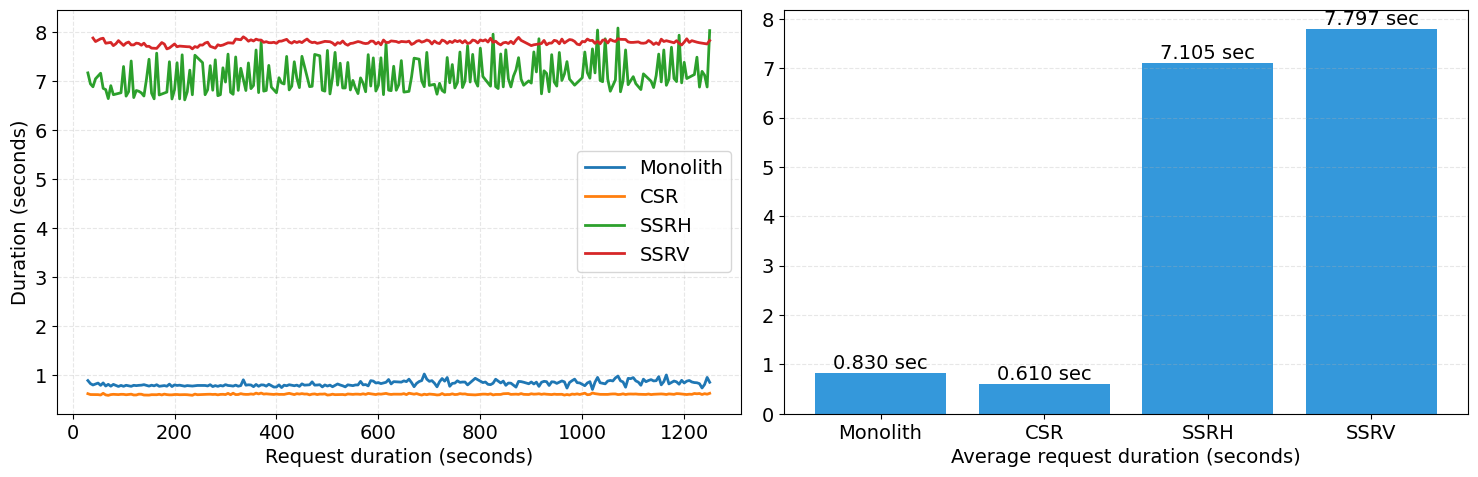

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Colors
bar_color = '#3498db'
line_color = '#2ecc71'

# Plot throughput as line chart
ax1.plot(csr_df['timestamp'], monolith_df['duration_mean'], label='Monolith', linewidth=2)
ax1.plot(csr_df['timestamp'], csr_df['duration_mean'], label='CSR', linewidth=2)
ax1.plot(ssrh_df['timestamp'], ssrh_df['duration_mean'], label='SSRH', linewidth=2)
ax1.plot(ssrv_df['timestamp'], ssrv_df['duration_mean'], label='SSRV', linewidth=2)

ax1.set_ylabel('Duration (seconds)')
ax1.set_xlabel('Request duration (seconds)')
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.legend()

# Plot duration as bar chart
architectures = ['Monolith','CSR', 'SSRH', 'SSRV']
durations = [
    monolith_df['duration_mean'].mean(),
    csr_df['duration_mean'].mean(),
    ssrh_df['duration_mean'].mean(),
    ssrv_df['duration_mean'].mean()
]

x = np.arange(len(architectures))
bars2 = ax2.bar(x, durations, color=bar_color)
ax2.set_xticks(x)
ax2.set_xticklabels(architectures)
ax2.set_xlabel('Average request duration (seconds)')
ax2.grid(True, linestyle='--', alpha=0.3, axis='y')

# Add value labels on duration bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f} sec',
             ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

plt.show()